In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy as sc
from imblearn.over_sampling import RandomOverSampler
from IPython.display import display

## Loading Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("./magic+gamma+telescope/magic04.data", names=cols)
df[df["class"]!='g'].head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12332,93.7035,37.9432,3.1454,0.1680,0.1011,53.2566,89.0566,11.8175,14.1224,231.9028,h
12333,102.0005,22.0017,3.3161,0.1064,0.0724,-54.0862,43.0553,-15.0647,88.4636,274.9392,h
12334,100.2775,21.8784,3.1100,0.3120,0.1446,-48.1834,57.6547,-9.6341,20.7848,346.4330,h
12335,91.6558,18.8293,2.7097,0.4386,0.3420,-52.6841,-97.8373,-17.0955,63.8834,130.7998,h
12336,38.0195,12.6736,2.8747,0.4084,0.1928,-51.4840,8.3471,7.9620,24.5402,163.8674,h


In [3]:
df["class"] = (df["class"] == 'g').astype(int)

## Exploring Dataset:

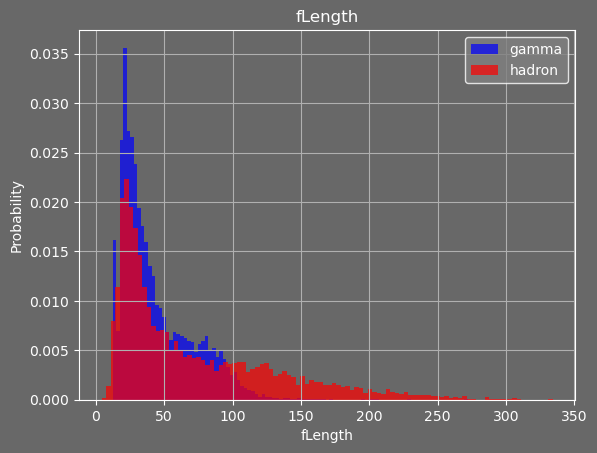

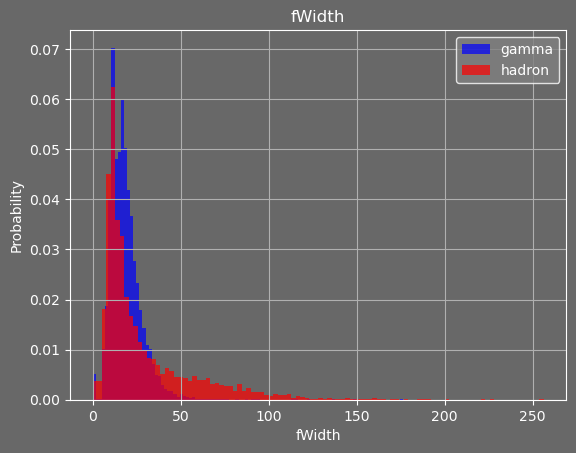

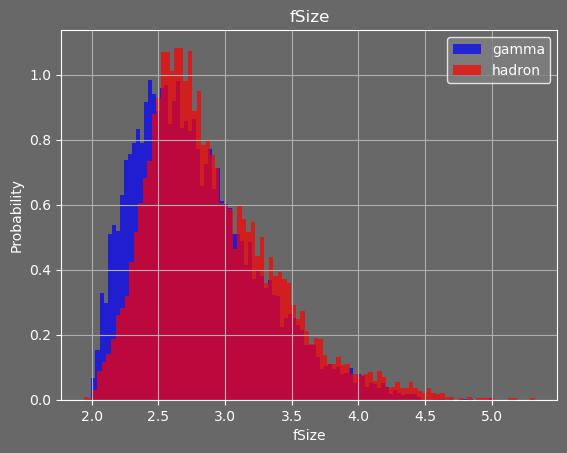

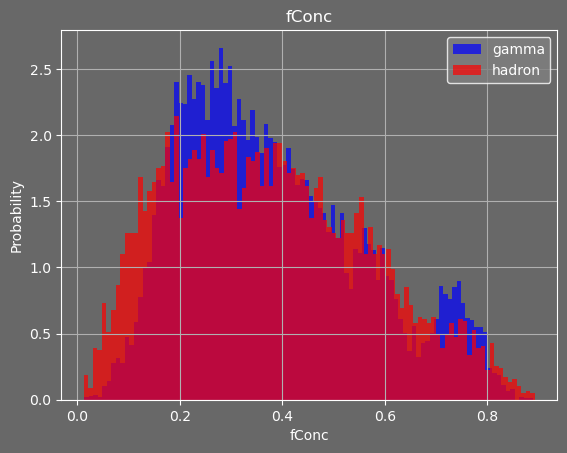

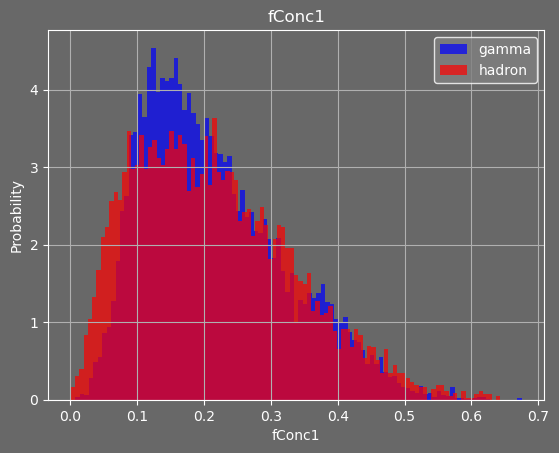

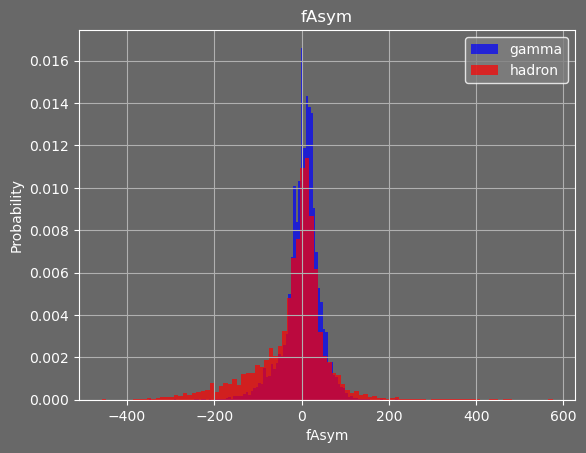

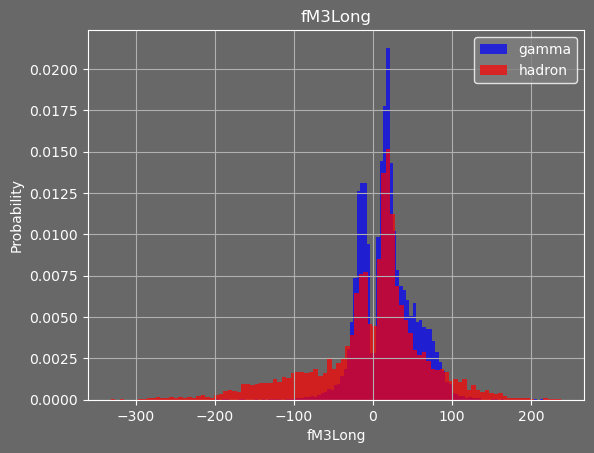

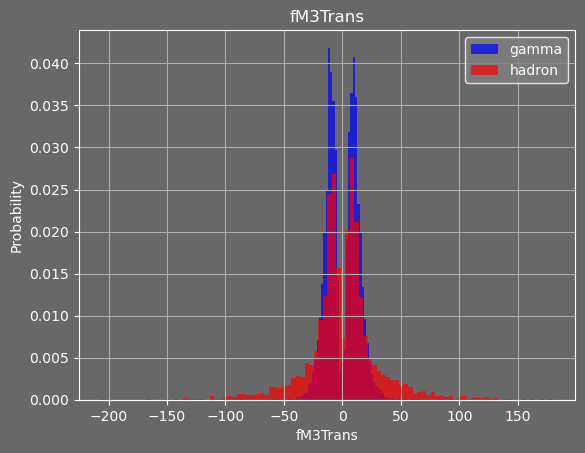

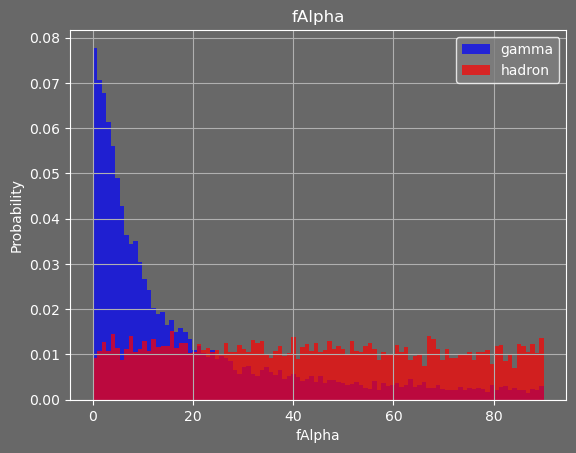

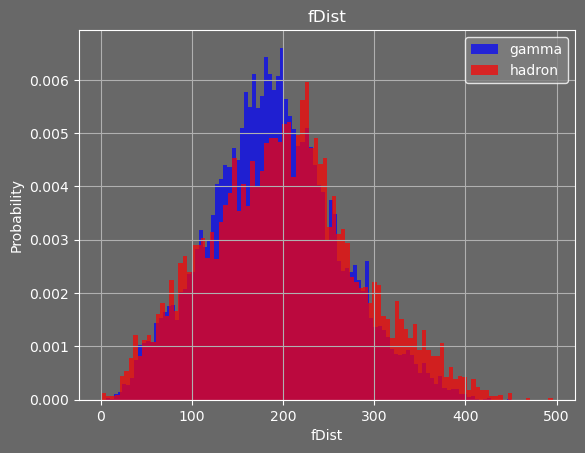

In [4]:
plt.rcParams.update({
    'axes.facecolor': '#686868',     # Background color of the axes
    'axes.edgecolor': 'white',        # Edge color of the axes
    'axes.labelcolor': 'white',       # Color of the labels
    'xtick.color': 'white',           # Color of the x-tick labels
    'ytick.color': 'white',           # Color of the y-tick labels
    'legend.facecolor': 'grey',       # Background color of the legend
    'legend.edgecolor': 'white',      # Edge color of the legend
    'text.color': 'white',            # Color of the text
    'figure.facecolor': '#686868'    # Background color of the figure
})
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], bins=100, label='gamma', color='blue', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], bins=100, label='hadron', color='red', alpha=0.7, density=True)
    plt.title(label)
    plt.grid(True)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, Validation and Test Datasets

In [5]:
train, validation, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/syarnaq/anaconda3/envs/ml/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe.iloc[:,:-1].values
    y = dataframe.iloc[:,-1].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
        
    
    data = np.hstack((X,np.reshape(y, (-1,1))))
    
    return data, X, y
    

In [7]:
train, x_train, y_train = scale_dataset(train, True)
validation, x_validation, y_validation = scale_dataset(validation, False)
test, x_test, y_test = scale_dataset(test, False)

## K-Nearest Neighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [9]:
# k_value = []
# accur = []
# for k in range(1,40):
#     knn_model = KNeighborsClassifier(n_neighbors=k)
#     knn_model.fit(x_train, y_train)
#     y_pred = knn_model.predict(x_test)
#     accur.append(accuracy_score(y_pred, y_test))
#     k_value.append(k)

# plt.plot(k_value, accur, '-o')
# plt.show()
    

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [11]:
y_pred = knn_model.predict(x_test)

In [12]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1250
           1       0.89      0.85      0.87      2554

    accuracy                           0.83      3804
   macro avg       0.80      0.82      0.81      3804
weighted avg       0.83      0.83      0.83      3804



## Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.41      0.53      1369
           1       0.73      0.92      0.82      2435

    accuracy                           0.74      3804
   macro avg       0.74      0.66      0.67      3804
weighted avg       0.74      0.74      0.71      3804



## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1369
           1       0.84      0.83      0.83      2435

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## Support Vector Machines

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1369
           1       0.88      0.90      0.89      2435

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804

